In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing rainfall prediction dataset Csv file using pandas

In [3]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

In [4]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
df.shape

(8425, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

#Comment :
1.ther are 16 float type variable and 7 object in nature.
2.Rain tomorrow are Target Variable.
This dataset contain 7752 Rows and 25 Columns.

#Statistical Analysis
Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.

In [7]:
df.duplicated().sum() # This will check if any duplicate entry or duplicate row with same value exist

1663

Let check if any whitespace, 'NA' or '-' exist in dataset.

In [8]:
df.isin([' ','NA','-']).sum().any()

False

In [9]:
# Let drop duplicated entry from dataset.

df.drop_duplicates(keep='last',inplace= True)

#Comment:
No Duplicate entry in dataset.
No whitespace, NA, '-' exist in dataset.


In [10]:
#checking missing values
df.isnull().sum().sort_values(ascending=False)

Sunshine         3236
Evaporation      2921
Cloud3pm         1902
Cloud9am         1866
Pressure3pm      1311
Pressure9am      1308
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
Rainfall          138
RainToday         138
RainTomorrow      138
WindSpeed3pm      100
Humidity3pm        96
Temp3pm            92
MinTemp            70
WindSpeed9am       63
MaxTemp            57
Humidity9am        54
Temp9am            51
Location            0
Date                0
dtype: int64

In [11]:
# As almost 40-50% data is missing,we are going to delete columns= Evaporation','Sunshine'
df.drop(columns=['Evaporation','Sunshine','Cloud3pm','Cloud9am'],axis=1,inplace=True)

In [12]:
df.columns.groupby(df.dtypes)

{float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'], object: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']}

In [13]:
#replacing thetwo columns with numericals
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)


In [14]:
#lets divide the variables in numericals and caterogical before moving forward
Numerical=['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 
           'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
            'Temp9am', 'Temp3pm']
Categorical=['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [15]:
#Now we can replace the values with mean and mode 
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,0.0
8421,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,0.0
8422,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,0.0
8423,2017-06-24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0.0,0.0


In [16]:
# Converting Date datatypes and spliting date into date, month and year.
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0,5,12,2008


In [17]:
#imputation of cat data with mode


df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [18]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,...,24.0,1024.6,1020.3,10.1,22.4,0.0,0.0,21,6,2017
8421,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,...,21.0,1023.5,1019.1,10.9,24.5,0.0,0.0,22,6,2017
8422,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,...,24.0,1021.0,1016.8,12.5,26.1,0.0,0.0,23,6,2017
8423,2017-06-24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,...,24.0,1019.4,1016.5,15.1,26.0,0.0,0.0,24,6,2017


In [19]:
from sklearn.impute import SimpleImputer
Si=SimpleImputer
Numerical=['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 
           'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
            'Temp9am', 'Temp3pm']
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].median())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].median())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].median())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].median())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].median())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].median())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].median())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].median())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].median())
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].median())
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].median())

In [20]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

Comment :
Finally, No Missing Value is Present.
we can procedd further

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,6762.0,13.110086,5.540674,-2.0,9.0,13.2,17.4,28.5
MaxTemp,6762.0,24.093301,6.130367,8.2,19.6,23.5,28.4,45.5
Rainfall,6762.0,2.723410,10.490138,0.0,0.0,0.0,0.8,371.0
WindGustSpeed,6762.0,38.702159,13.393977,7.0,30.0,37.0,46.0,107.0
WindSpeed9am,6762.0,12.765602,9.789075,0.0,6.0,11.0,19.0,63.0
WindSpeed3pm,6762.0,17.562703,9.548883,0.0,11.0,17.0,24.0,83.0
Humidity9am,6762.0,67.510500,17.182756,10.0,56.0,68.0,80.0,100.0
Humidity3pm,6762.0,50.460515,18.498424,6.0,38.0,50.0,62.0,99.0
Pressure9am,6762.0,1017.621222,6.027923,989.8,1014.2,1017.6,1020.9,1039.0
Pressure3pm,6762.0,1015.116060,5.967643,982.9,1011.5,1015.1,1018.4,1036.0


In [22]:
#Start Exploring  rainfall counts
df['RainTomorrow'].value_counts()



0.0    5190
1.0    1572
Name: RainTomorrow, dtype: int64

In [23]:
#this shows that our target variable is  unbalanced , we vl balance it using SMOTE.

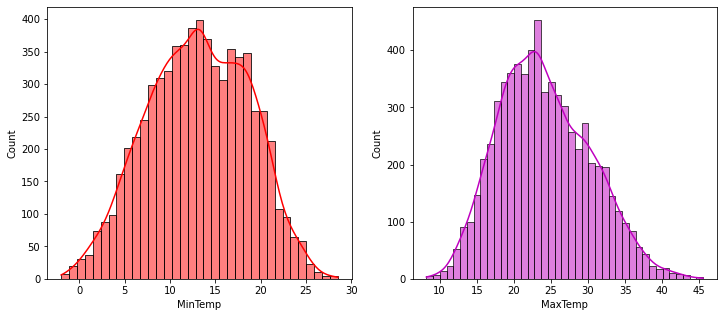

In [24]:
# Plotting histogram for present_Tmax and present_Tmin variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['MinTemp'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['MaxTemp'],kde=True,color='m')
plt.show()

#Comment:
For majority of reading Present Temperature Maximum varies in between 27.5 to 32.5 degree.
For majority of reading Present Temperature Minimum varies in between 22.5 to 26 degree.

In [25]:
#checking the values for max and min temp
pd.set_option('display.max_columns', None)
df.loc[df.MaxTemp==df.MaxTemp.max()]

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
4154,2017-02-11,Williamtown,25.0,45.5,0.0,SSW,43.0,WSW,WSW,7.0,13.0,75.0,26.0,1008.5,1002.6,27.3,43.9,0.0,0.0,11,2,2017


In [26]:
df.loc[df.MaxTemp==df.MaxTemp.min()]

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
193,2009-06-12,Albury,-1.3,8.2,0.0,ESE,15.0,E,SSE,6.0,6.0,99.0,72.0,1025.7,1022.2,1.9,7.9,0.0,0.0,12,6,2009


In [27]:
df.loc[df.MinTemp==df.MinTemp.max()]

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
7984,2014-01-12,PerthAirport,28.5,43.0,0.0,E,61.0,N,SW,22.0,33.0,12.0,26.0,1007.6,1007.7,39.4,34.7,0.0,0.0,12,1,2014


In [28]:
df.loc[df.MinTemp==df.MinTemp.min()]

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
192,2009-06-11,Albury,-2.0,9.6,0.0,SE,13.0,N,ESE,0.0,6.0,84.0,72.0,1025.1,1023.0,2.2,8.8,0.0,0.0,11,6,2009
560,2010-06-14,Albury,-2.0,13.2,0.0,ESE,17.0,N,E,0.0,6.0,85.0,50.0,1035.2,1032.0,2.2,12.6,0.0,0.0,14,6,2010


#comments
1. We get high value of solar radiation of high temperature day ,
   and Low radiation values at low temperature day.
2. Maximum Humidity occur when global temeperature minima occur. This might implies that humidity and temperature are inversely related.We will try to verify this.
3. Solar radiation has naturally going to have effect on wind speed,precipitation and humidity.

In [29]:
#Let Visualise & gain insight over this by plotting line plot over all locations

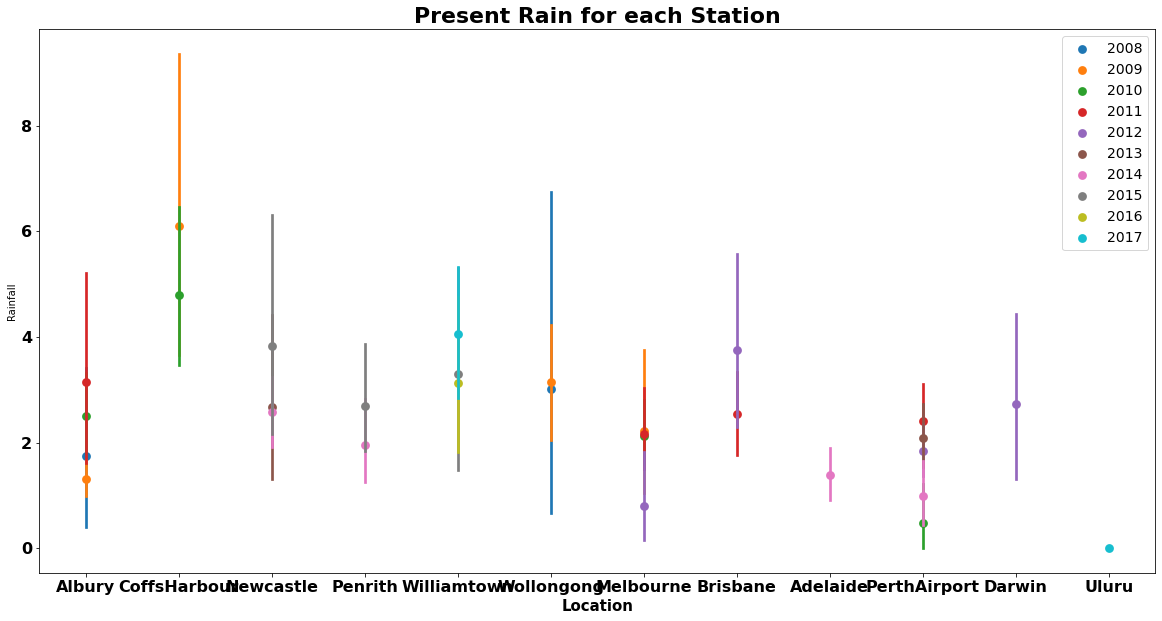

In [30]:
plt.figure(figsize=(20,10))

sns.pointplot(x='Location', y='Rainfall', data=df, hue='Year',join=False)
plt.title('Present Rain for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Location',{'fontsize':15,'fontweight' :'bold'})

plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)


#comments;
1. 2009, received max rainfall in coffs harbour
2008 recored rainfall in max places in wollongon
3. rest of the places recieved average of 2-6 cm of rainfall from 2008-16

In [31]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,0.0,21,6,2017
8421,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,0.0,22,6,2017
8422,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,0.0,23,6,2017
8423,2017-06-24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0.0,0.0,24,6,2017


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U1'), dtype('float64')) -> None

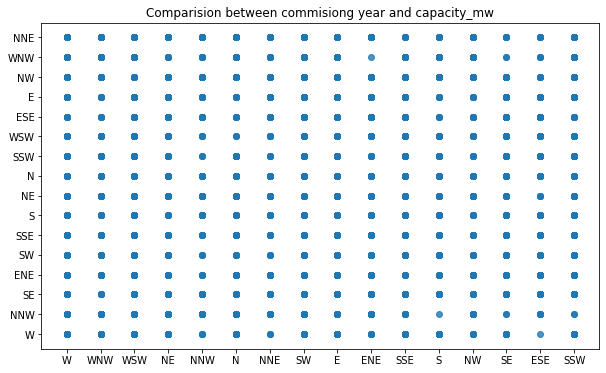

In [32]:

plt.figure(figsize=[10,6])
plt.title('Comparision between commisiong year and capacity_mw')
sns.regplot(df['WindGustDir'],df['WindDir9am'])

<AxesSubplot:xlabel='Rainfall', ylabel='Count'>

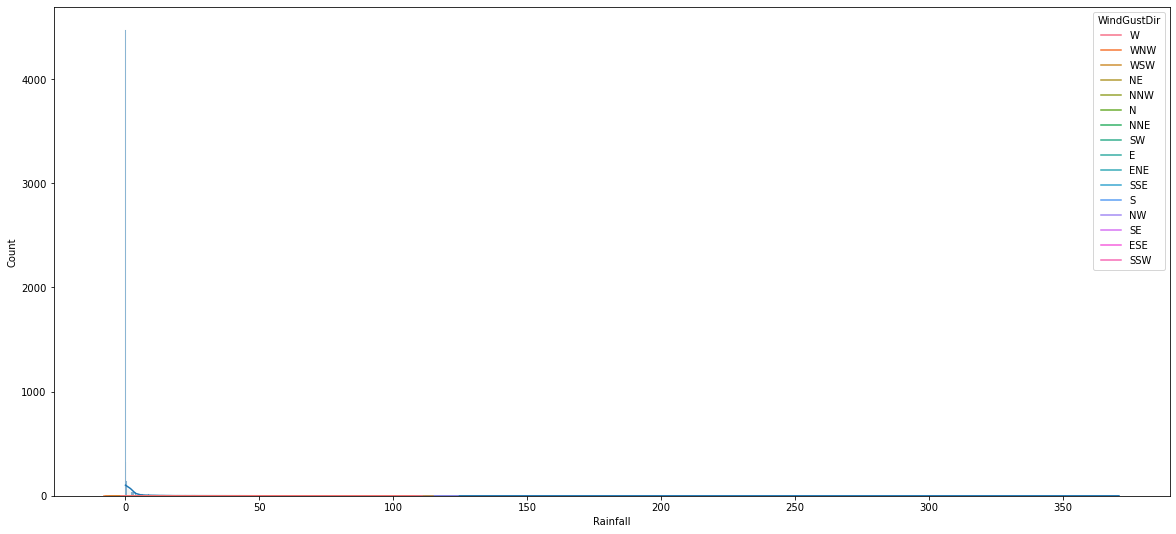

In [33]:
#lets see the relationship between wind speed and direction:
ax=plt.figure(20,figsize=(20,9))
sns.histplot(data=df.Rainfall,kde=True)
sns.kdeplot(x='WindGustSpeed',hue='WindGustDir',data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

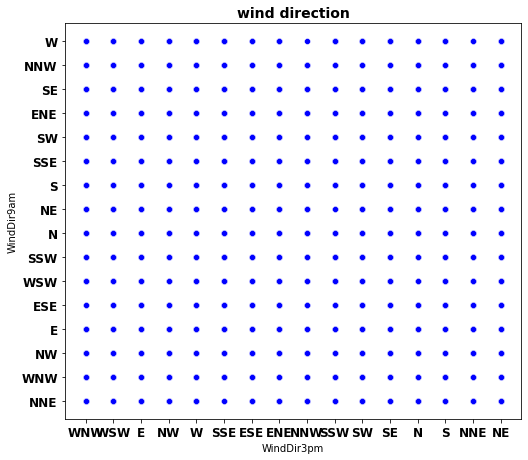

In [34]:
#comparison of wind at different timings:

plt.figure(figsize=(18,16))

plt.subplot(2,2,1)
plt.title('wind direction',fontsize=14, fontweight='bold')
sns.scatterplot(x='WindDir3pm',y='WindDir9am',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')



ValueError: num must be 1 <= num <= 9, not 10

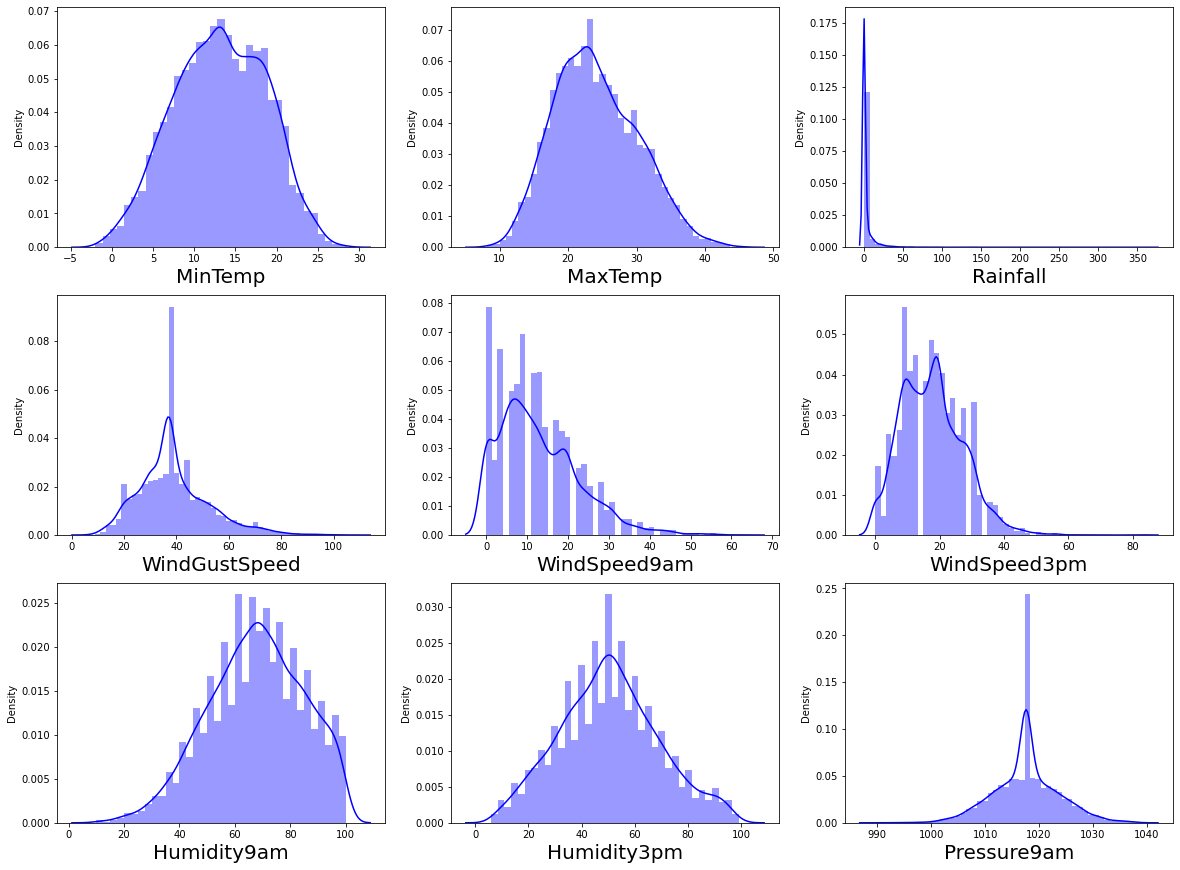

In [35]:
#Checking how the data has been distributed in each column
Numerical=['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 
           'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
            'Temp9am', 'Temp3pm']
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=12:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()


#comment:
1. wind speed and rainfall shows some skweness, which we try to remove later
2. rest of the features are normaly distributed



In [ ]:
df

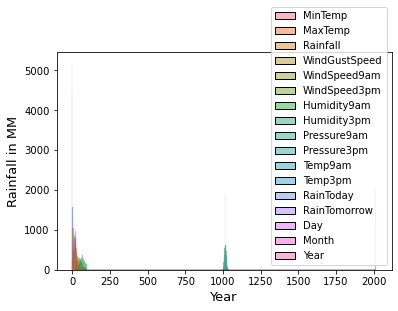

In [36]:
sns.histplot(data=df)
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.show()

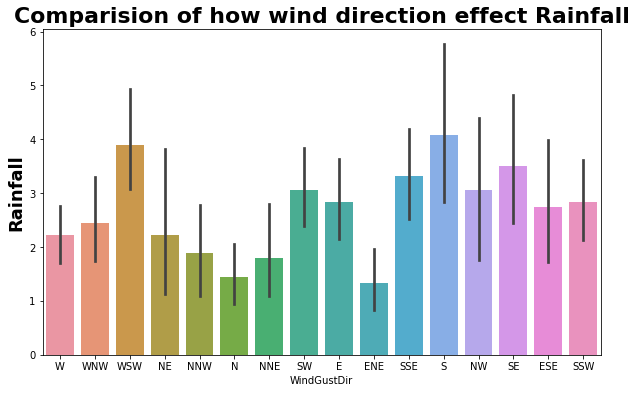

In [37]:
plt.figure(figsize = (10,6))
plt.title("Comparision of how wind direction effect Rainfall", fontsize=22, fontweight='bold')
a= sns.barplot(y = "Rainfall", x = "WindGustDir", data = df)
a.set_xlabel('WindGustDir')
a.set_ylabel('Rainfall',fontsize=18,fontweight ='bold')
plt.show()
#hence nuclear  power plant has max capacity in mv 

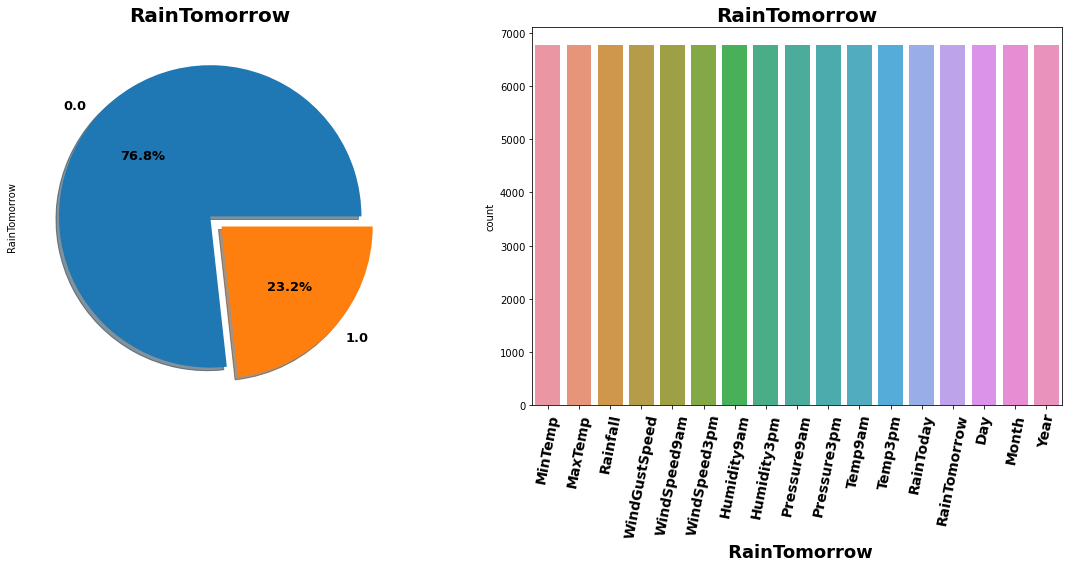

In [38]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df['RainTomorrow'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('RainTomorrow', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('RainTomorrow')
sns.countplot(data=df,ax=ax[1])
ax[1].set_title('RainTomorrow',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" RainTomorrow",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=79)
plt.tight_layout()
plt.show()


(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

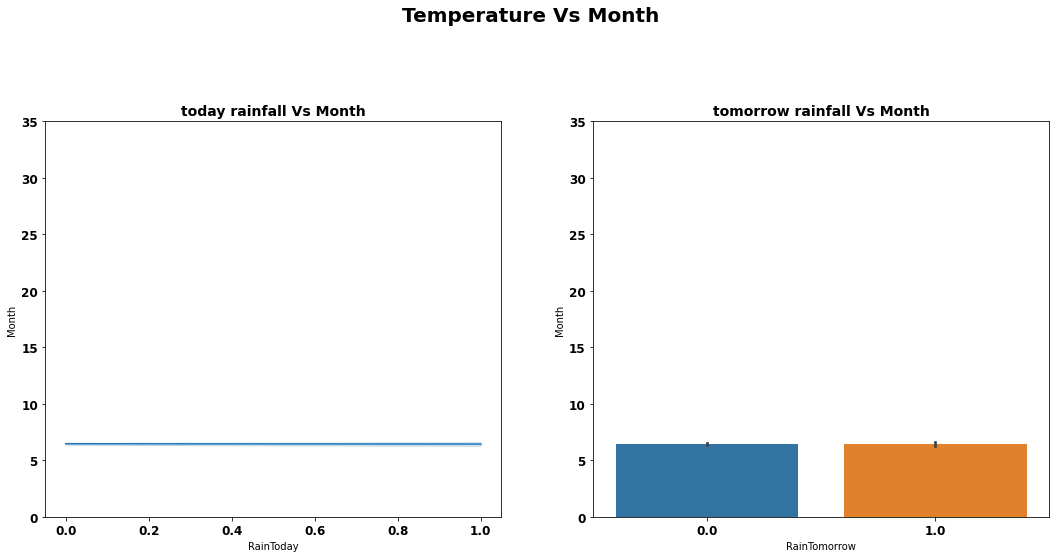

In [39]:
#lets co,pare the today and tomorrow rainfall vs month
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Temperature Vs Month',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('today rainfall Vs Month',fontsize=14, fontweight='bold')
axes=sns.lineplot(x='RainToday',y='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('tomorrow rainfall Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(x='RainTomorrow',y='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')



<AxesSubplot:xlabel='Humidity3pm', ylabel='Count'>

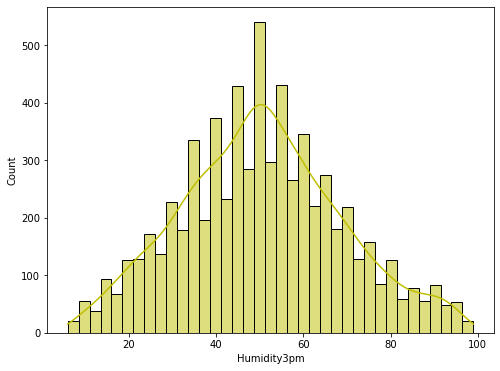

In [40]:
plt.figure(figsize=(8,6))
sns.histplot(df['Humidity3pm'],kde=True,color='y')


<AxesSubplot:xlabel='Humidity9am', ylabel='Count'>

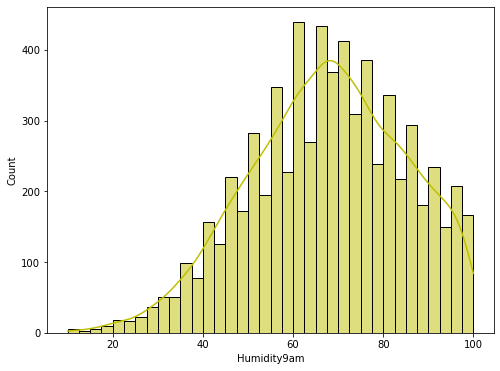

In [41]:
plt.figure(figsize=(8,6))
sns.histplot(df['Humidity9am'],kde=True,color='y')


#COMMENT:
1. HUMIDITY AT9 AM IS NEAR TO 400 LIED IN THE RANGE OF 60-80.
2. HUMDITY AT 6PM IS 380  LIES IN THE RANGE OF 40-60..
THIS SHOWS  HUMDITY MORE AT MRG TIME 

In [ ]:
df.info()

<AxesSubplot:xlabel='WindDir9am', ylabel='Count'>

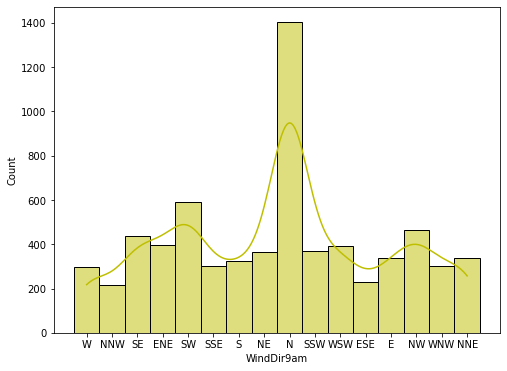

In [42]:
plt.figure(figsize=(8,6))
sns.histplot(df['WindDir9am'],kde=True,color='y')


<AxesSubplot:xlabel='WindDir3pm', ylabel='Count'>

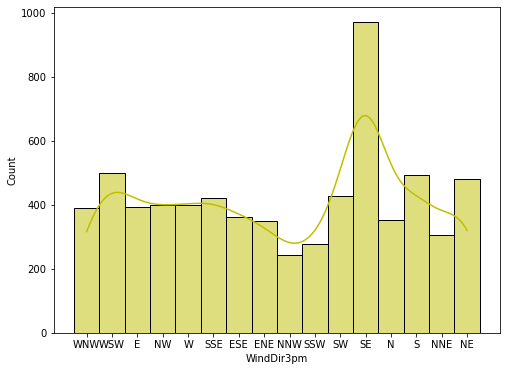

In [43]:
plt.figure(figsize=(8,6))
sns.histplot(df['WindDir3pm'],kde=True,color='y')

    Observation :
    1.wind direction in the mrg time is mostly from southeast,north, north west direction.
    2. wind direction in the evening time mostly from wsw,south est direction.
    3. data , here is mostly skewed.

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Count'>

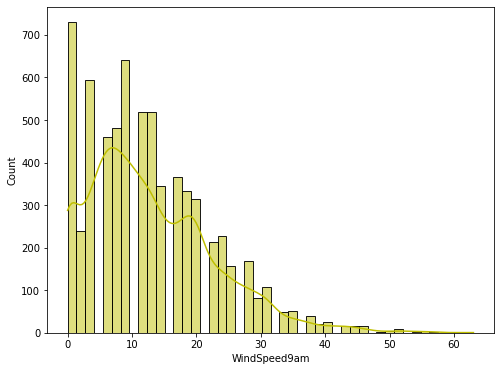

In [44]:
plt.figure(figsize=(8,6))
sns.histplot(df['WindSpeed9am'],kde=True,color='y')


<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Count'>

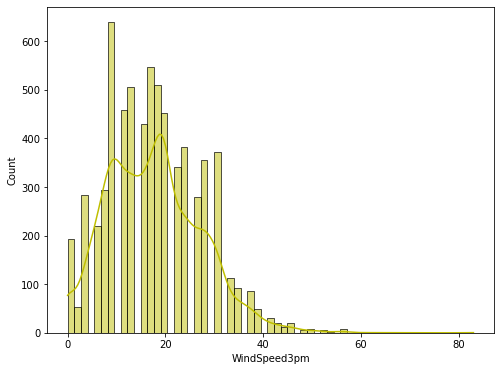

In [45]:
plt.figure(figsize=(8,6))
sns.histplot(df['WindSpeed3pm'],kde=True,color='y')


observation:
    1. wind speed is rightly  skewed.
    2.Windspped at 9 am seems to be high during first few hrs and reducing afterwards.
    3. windspped at 3 pm semms to be high during mid hrs...

<AxesSubplot:xlabel='Pressure9am', ylabel='Count'>

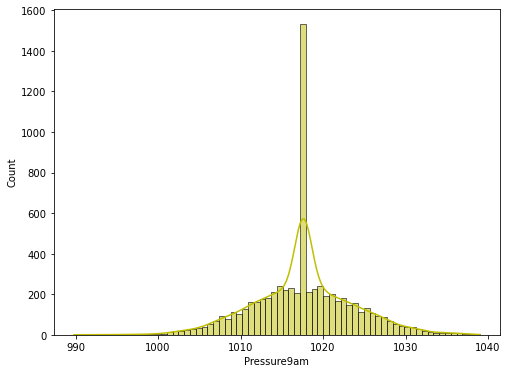

In [46]:
plt.figure(figsize=(8,6))
sns.histplot(df['Pressure9am'],kde=True,color='y')


<AxesSubplot:xlabel='Pressure3pm', ylabel='Count'>

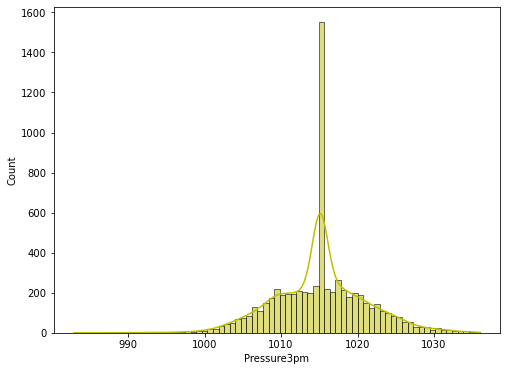

In [47]:
plt.figure(figsize=(8,6))
sns.histplot(df['Pressure3pm'],kde=True,color='y')

In [ ]:
COMMENTS


1. PRESSURE IS MORE AT9 AM.
2. Graph is slightly right skewed.

<AxesSubplot:xlabel='Temp9am', ylabel='Count'>

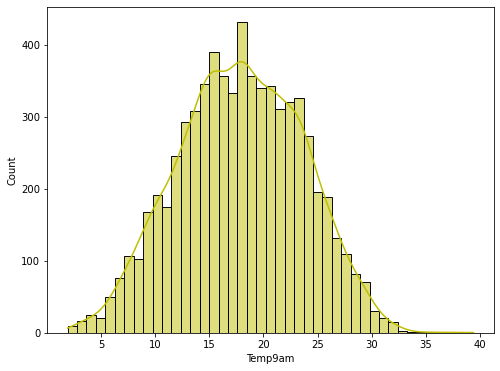

In [48]:
plt.figure(figsize=(8,6))
sns.histplot(df['Temp9am'],kde=True,color='y')


<AxesSubplot:xlabel='Temp3pm', ylabel='Count'>

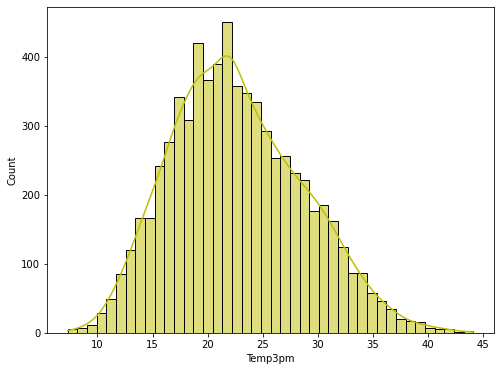

In [49]:
plt.figure(figsize=(8,6))
sns.histplot(df['Temp3pm'],kde=True,color='y')


observation:
    
1.Temp at 3pm and Temp at 9 am  are almost normally distributed.
Temp 3pm for majority of days its values lies in the range 20 to 25 (Â°C).
Temp at 9 am for majority of days its values lies in the range 20 to 23 (Â°C).

Encoding categorical data

In [50]:
# Using Label Encoder on categorical variable
#lets divide the variables in numericals and caterogical before moving forward
Numerical=['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 
           'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
            'Temp9am', 'Temp3pm']
Categorical=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    df[i] = le.fit_transform(df[i])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,1,12,2008
1,2008-12-02,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,2,12,2008
2,2008-12-03,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,3,12,2008
3,2008-12-04,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0,4,12,2008
4,2008-12-05,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0,5,12,2008


# Feature selection and Engineering

In [ ]:
##outllier detection:
df.shape

In [51]:
# Droping unnecessary columns
df.drop(['Date'], axis=1, inplace=True)

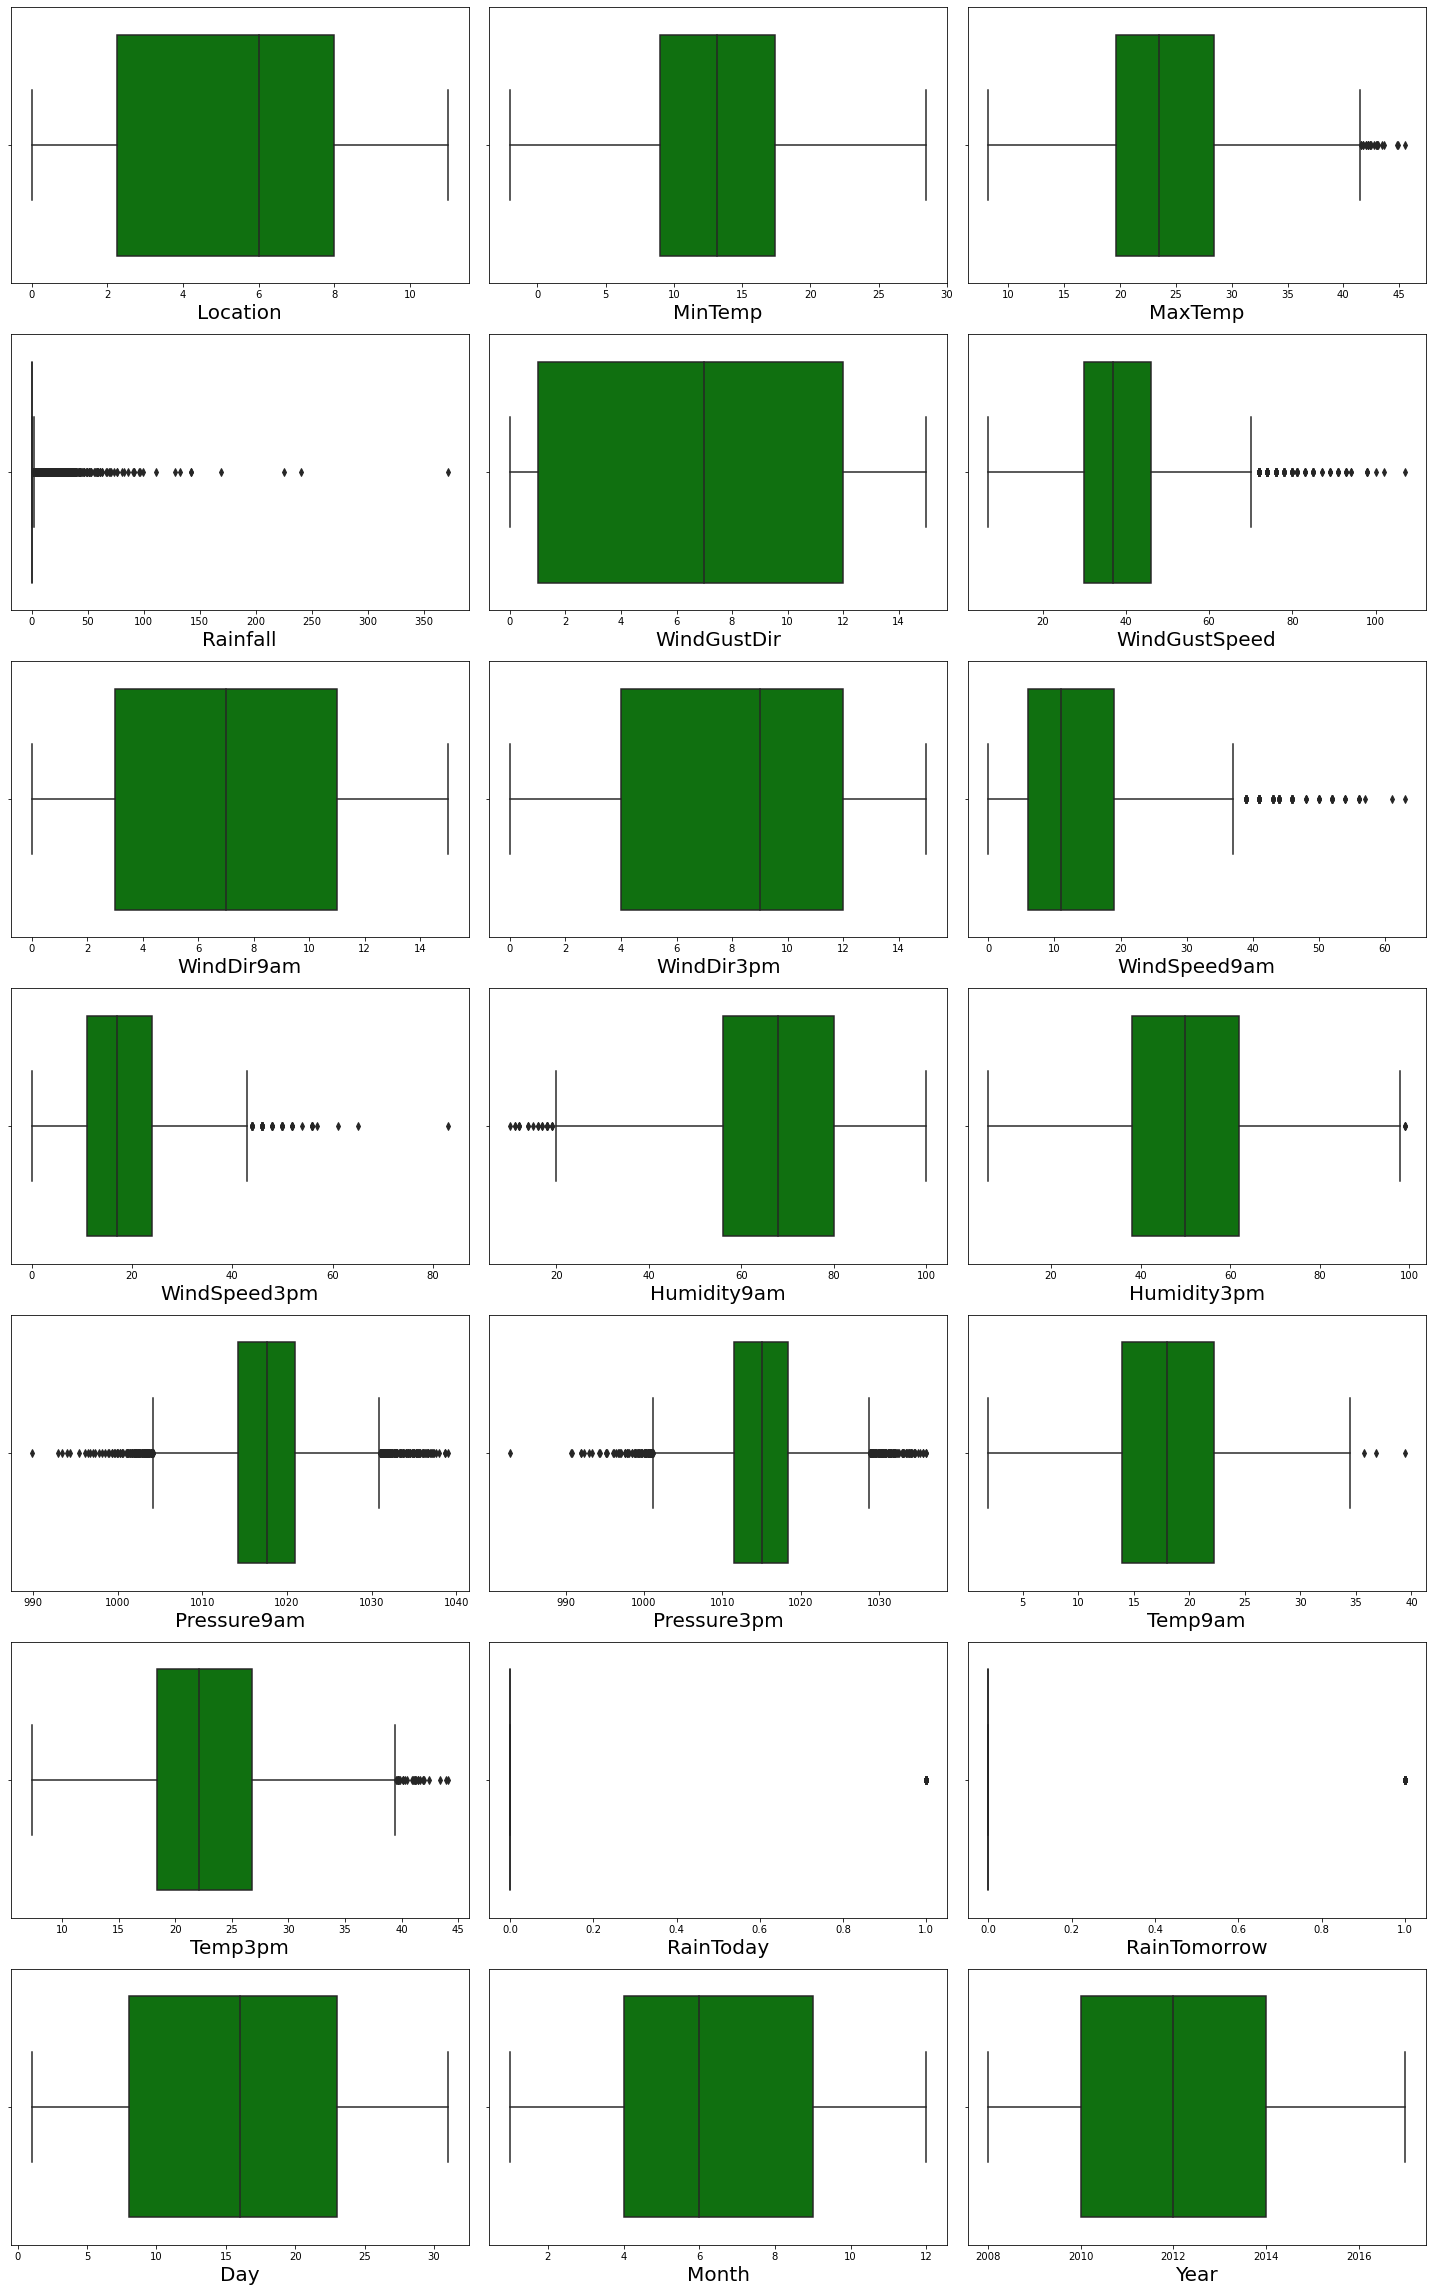

In [52]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [ ]:
df.columns

In [53]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (6762, 21)
Shape of the dataframe after removing outliers:  (6458, 21)
Percentage of data loss post outlier removal:  4.495711328009465


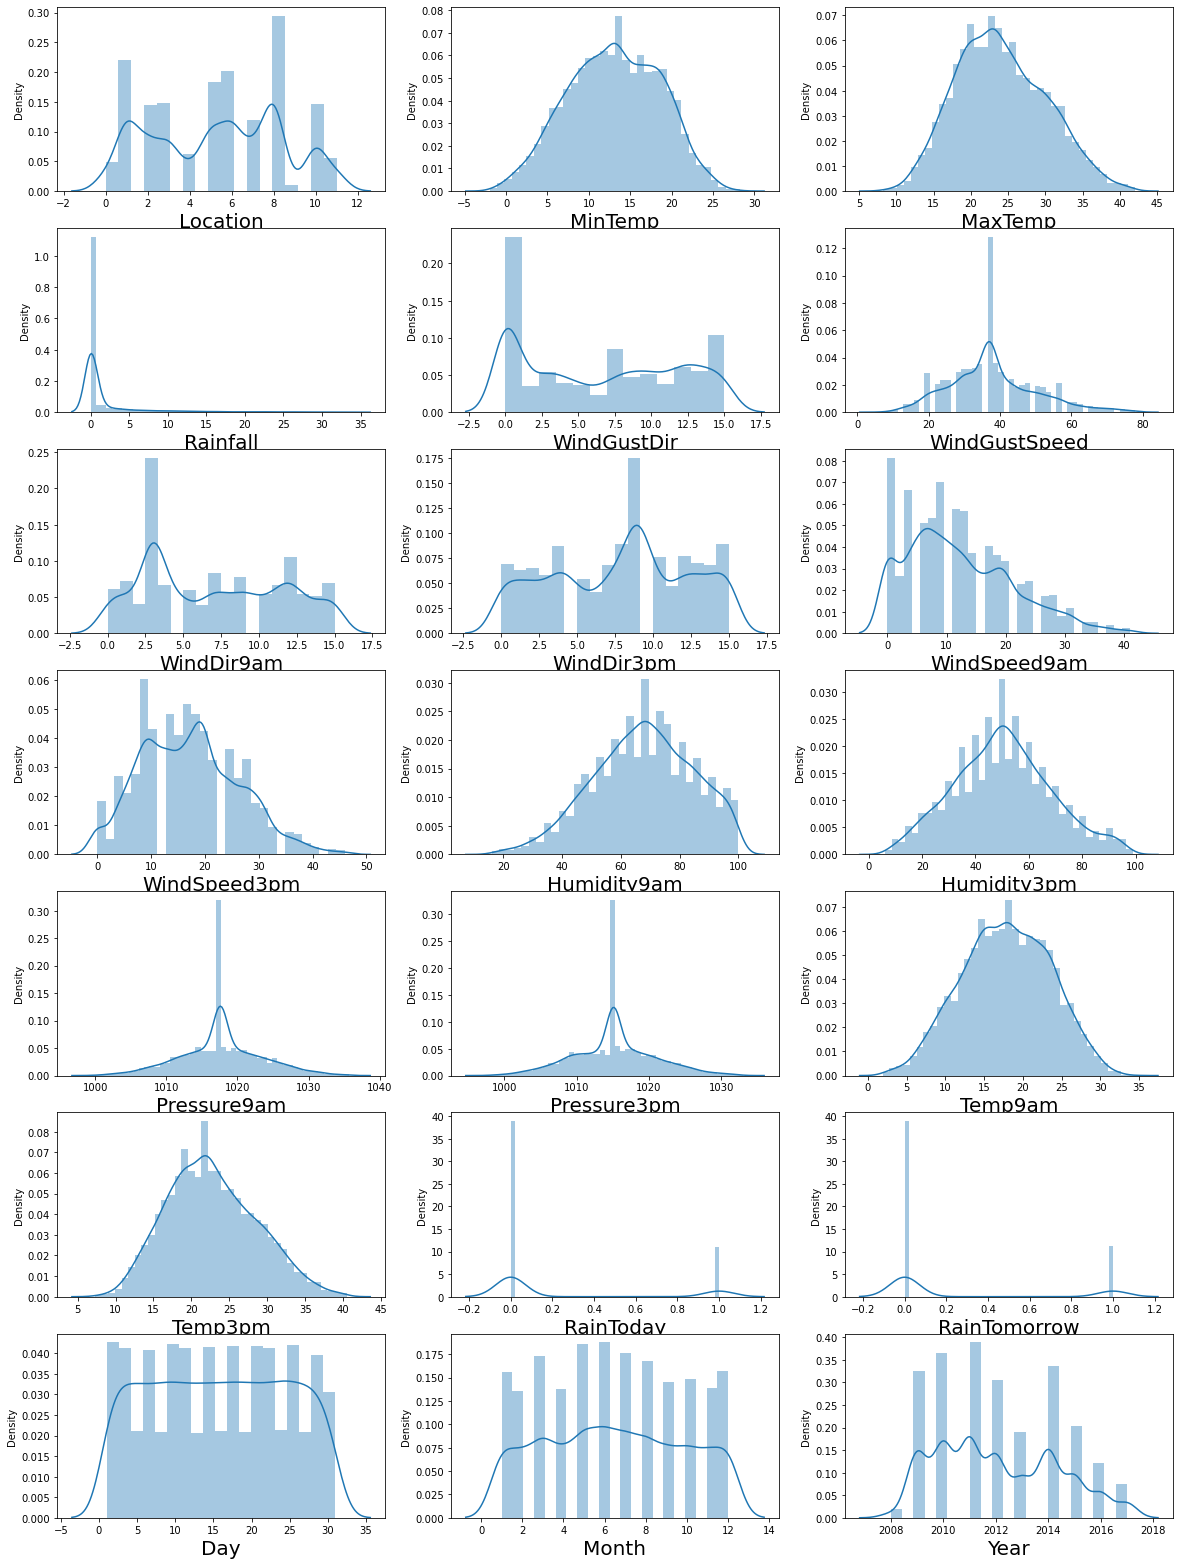

In [54]:
# 2. Skewness of features
plt.figure(figsize=(20,40),facecolor='white')

plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [55]:
df.skew()

Location        -0.001665
MinTemp         -0.083407
MaxTemp          0.266125
Rainfall         3.521080
WindGustDir      0.101739
WindGustSpeed    0.545963
WindDir9am       0.210259
WindDir3pm      -0.128190
WindSpeed9am     0.685188
WindSpeed3pm     0.342797
Humidity9am     -0.230721
Humidity3pm      0.159848
Pressure9am      0.062138
Pressure3pm      0.089852
Temp9am         -0.075345
Temp3pm          0.290966
RainToday        1.338894
RainTomorrow     1.333507
Day              0.004620
Month            0.029230
Year             0.341449
dtype: float64

#Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature lSike month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.

We also going to ignore sknewness in target feature.

In [56]:
## Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')




In [ ]:
##Machine Learning Model Building

In [58]:
# Splitting data in target and dependent feature
X = df.drop(['RainTomorrow'], axis =1)
Y = df['RainTomorrow']


In [59]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [60]:
#Checking Multicollinearity between features using variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.645469,Location
1,8.182378,MinTemp
2,26.366357,MaxTemp
3,2.011395,Rainfall
4,1.543373,WindGustDir
5,2.289837,WindGustSpeed
6,1.322777,WindDir9am
7,1.413705,WindDir3pm
8,2.063062,WindSpeed9am
9,1.941056,WindSpeed3pm


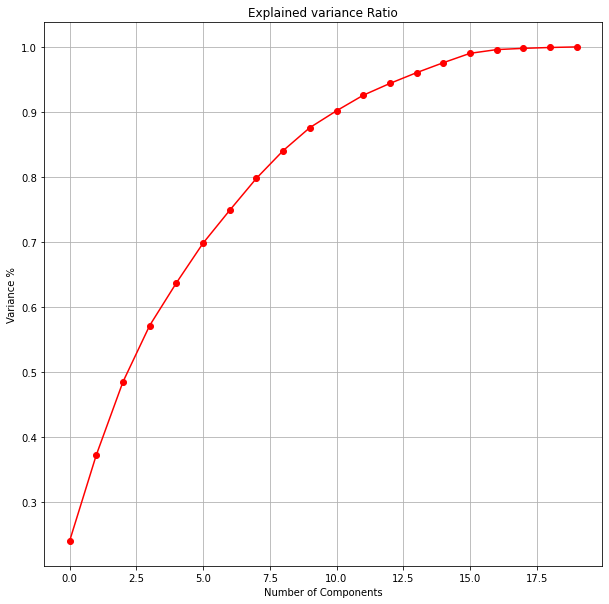

In [61]:
#FEW COLUMNS HAVE MORE VARIANCE FACTOR MORE THAN 10
#PCA
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [ ]:
#AS per the graph, we can see that 15 principal components attribute 
#for 90% of variation in the data. We shall pick the first 15 components for our prediction.

In [62]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)

In [63]:
principle_x=pd.DataFrame(x_new,columns=np.arange(15))

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso



In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4326, 15)
Training target vector size: (4326,)
Test feature matrix size: (2132, 15)
Test target vector size: (2132,)


In [68]:
#Finding best Random state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.3401535140037748 on Random_state 487


In [69]:
#Linear Regression Base Model
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=487, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [ 0.11135139  0.32322263  0.16176607 ...  0.18849317 -0.09802092
  0.35663501]


Actual Wins:
 7592    0.0
1251    0.0
8156    0.0
154     0.0
7931    0.0
       ... 
1337    0.0
35      0.0
2076    0.0
49      0.0
545     0.0
Name: RainTomorrow, Length: 2132, dtype: float64


In [70]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.26302073349200067
Mean squared error : 0.11646358183816594
Root Mean Squared Error: 0.3412676102974994


 R2 Score :
0.3401535140037748


In [71]:
## Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.2710015703540118


In [73]:
#Applying other ML Models
from sklearn.ensemble import BaggingRegressor
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()

In [74]:
model = [rf,XT,dtc,adb,gradb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.23561913696060038
Mean squared error : 0.11291022514071294
Root Mean Squared Error: 0.3360211676973832


 R2 Score :
0.3602857295281401


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.2328236397748593
Mean squared error : 0.11221923076923077
Root Mean Squared Error: 0.334991389097139


 R2 Score :
0.36420068904311764


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.2270168855534709
Mean squared error : 0.2270168855534709
Root Mean Squared Error: 0.47646289000663095


 R2 Score :
-0.2862071716325634


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.2991863789603355
Mean squared error : 0.12612443154896463
Root Mean Squared Error: 0.35514001682289287


 R2 Score :
0.28541813979670116


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.23252421783537477
Mean squared error : 0.11087213374784588
Root Mean Squared Error: 0.3329746743340188


 R2 Score :
0.37183292241450705
